In [1]:
import pandas as pd
df = pd.read_csv('data/processed/preprocessed.csv')

8. Train-Test Split

In [2]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (352666, 11)
Test shape: (88167, 11)


9. Baseline Model (Logistic Regression)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97     38167
         1.0       0.98      0.98      0.98     50000

    accuracy                           0.98     88167
   macro avg       0.98      0.98      0.98     88167
weighted avg       0.98      0.98      0.98     88167

ROC-AUC Score: 0.9943295066418634


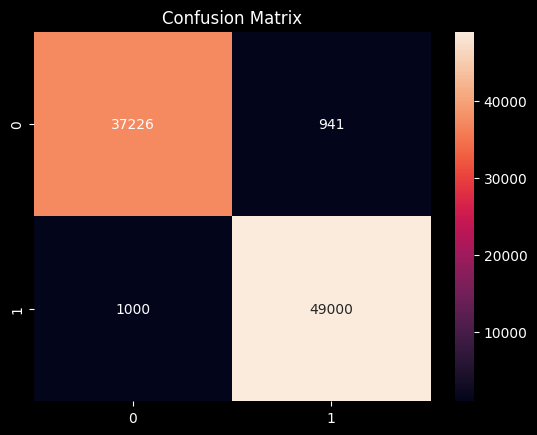

In [5]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
# Train a Logistic Regression model

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

10. Feature Importance

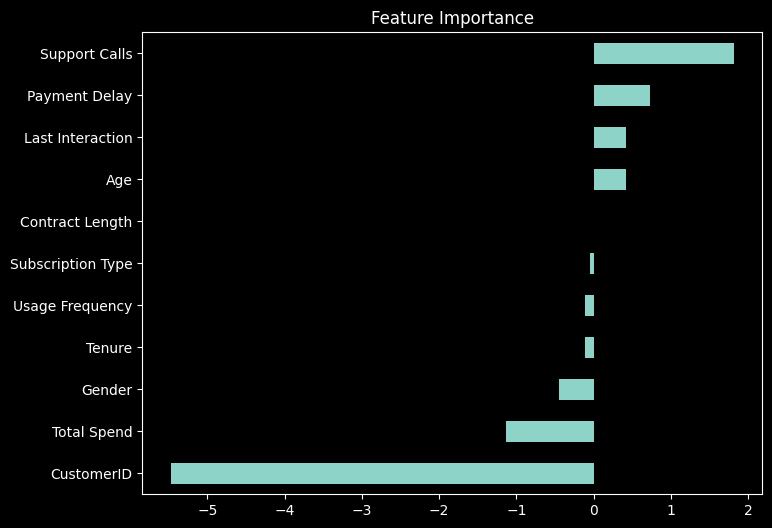

In [6]:
# For logistic regression
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Feature Importance')
plt.show()

 Advanced Model (Random Forest Example)

Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167

Random Forest ROC-AUC Score: 0.9999988154688605


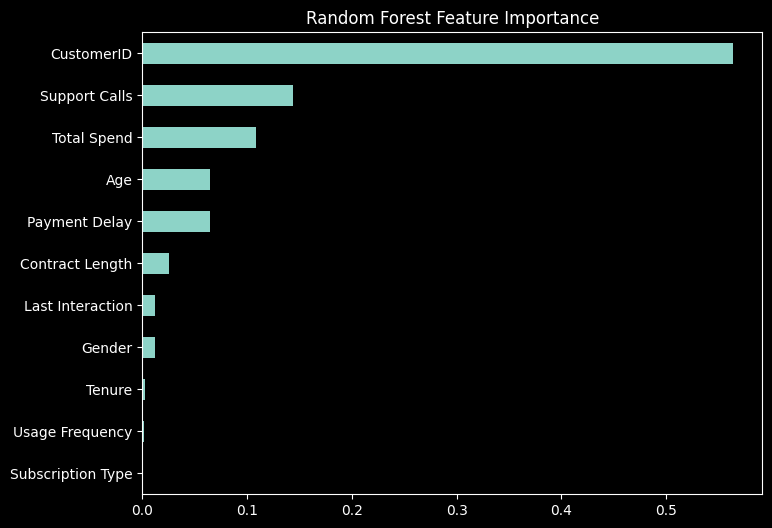

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))

# Feature importance
pd.Series(rf.feature_importances_, index=X.columns).sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Random Forest Feature Importance')
plt.show()

In [8]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html('eda_report.html')

from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Churn Data Profiling Report", explorative=True)
profile.to_file("reports/eda_profile.html")

/Users/manojrammopati/Projects/ds_template/CustomerChurn_Prediction/venv/lib/python3.12/site-packages/sweetviz/graph.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


                                             |          | [  0%]   00:00 -> (? left)

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:01<00:00, 10.91it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# Save Sweetviz and ydata-profiling reports as HTML files in the project directory

report.show_html('eda_report.html')
profile.to_file('reports/eda_profile.html')

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

1. Hyperparameter Tuning
Improve your model’s performance by tuning hyperparameters using GridSearchCV or RandomizedSearchCV.

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best ROC-AUC:", grid.best_score_)

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC-AUC: 0.9999987458711443


# Model Comparison
Try other models (XGBoost, LightGBM, SVM, etc.) and compare their performance. give codes foe every steps

In [17]:
# If not already installed, run these in a notebook cell:
%pip install xgboost lightgbm scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('data/processed/preprocessed.csv')
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

/Users/manojrammopati/Projects/ds_template/CustomerChurn_Prediction/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:43:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167

XGBoost ROC-AUC Score: 0.9999999952838841


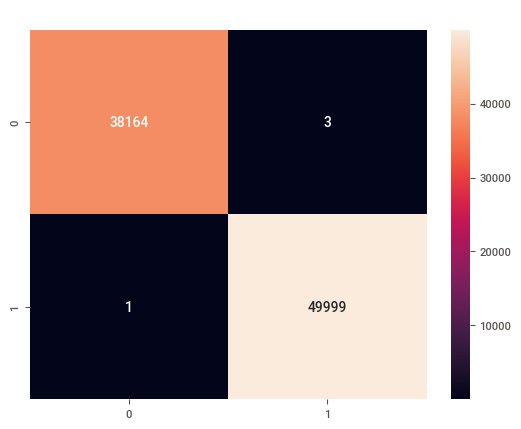

In [20]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:,1]

print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d')
plt.title('XGBoost Confusion Matrix')
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 200000, number of negative: 152666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 737
[LightGBM] [Info] Number of data points in the train set: 352666, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.567109 -> initscore=0.270065
[LightGBM] [Info] Start training from score 0.270065
LightGBM Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167

Li

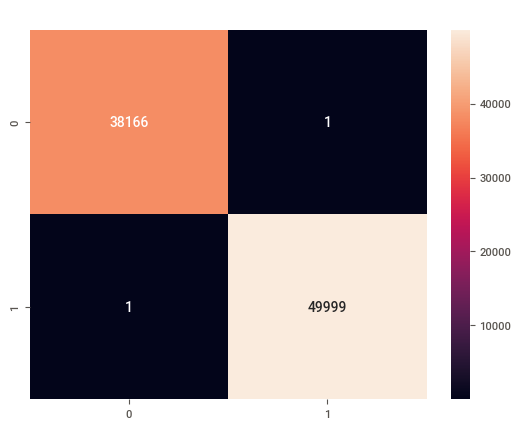

In [21]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
y_proba_lgbm = lgbm.predict_proba(X_test)[:,1]

print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgbm))
print("LightGBM ROC-AUC Score:", roc_auc_score(y_test, y_proba_lgbm))
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt='d')
plt.title('LightGBM Confusion Matrix')
plt.show()

SVM Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     38167
         1.0       0.99      1.00      0.99     50000

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167

SVM ROC-AUC Score: 0.9998396696098724


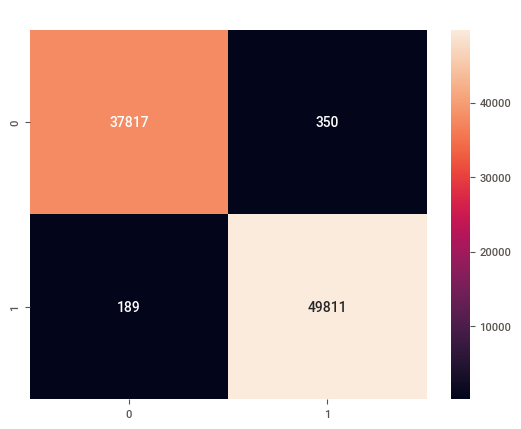

In [16]:
from sklearn.svm import SVC

svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_proba_svm = svm.predict_proba(X_test)[:,1]

print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM ROC-AUC Score:", roc_auc_score(y_test, y_proba_svm))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d')
plt.title('SVM Confusion Matrix')
plt.show()

In [22]:
print("ROC-AUC Scores:")
print("XGBoost:", roc_auc_score(y_test, y_proba_xgb))
print("LightGBM:", roc_auc_score(y_test, y_proba_lgbm))
print("SVM:", roc_auc_score(y_test, y_proba_svm))

ROC-AUC Scores:
XGBoost: 0.9999999952838841
LightGBM: 0.9999996138024996
SVM: 0.9998396696098724


3. Cross-Validation
Use cross-validation to get a more robust estimate of model performance.

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv=5, scoring='roc_auc')
print("Cross-validated ROC-AUC:", scores.mean())

Cross-validated ROC-AUC: 0.9910523293351847


4. Model Explainability
Use SHAP or LIME to interpret model predictions.

In [26]:
!pip install shap
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.6/547.6 kB 2.6 MB/s eta 0:00:002.5 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

5. Address Class Imbalance (if needed)
If your target is imbalanced, try SMOTE, class weights, or ensemble methods.

In [27]:
! pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


KeyboardInterrupt: 

6. Export Model for Deployment
Save your trained model using joblib or pickle.

In [28]:
import joblib
joblib.dump(rf, 'models/random_forest_churn.pkl')

['models/random_forest_churn.pkl']

In [29]:
import joblib
joblib.dump(xgb, 'models/xgboost_churn.pkl')  # or lgbm, svm, etc.

['models/xgboost_churn.pkl']

In [30]:
import joblib
model = joblib.load('models/random_forest_churn.pkl')
predictions = model.predict(X_test)
print("Predictions:", predictions)

Predictions: [1. 1. 0. ... 1. 1. 0.]
